# Model

Variables:
- Body mass (M), in kilograms (kg)
- Speed or intensity of activity (V), measured as meters per second (m/s) for running
- Duration of activity (T), in seconds (s) 

Dimensions:
   - Body mass (M) has the dimension $[M]$ (mass)
   - Speed (V) has the dimension $[L][T]^{-1}$ (length per time)
   - Time (T) has the dimension $[T]$ (time)


Calorie expenditure is a measure of energy, so it is expressed in units of energy like joules (J). For this project we assume 1 calorie ≈ 4.184 J. To find the relationship using dimensional analysis:
   - Energy (E) typically has dimensions $[M][L]^2[T]^{-2}$

Relationships: Assume energy expenditure (E) can be a function of mass (M), velocity (V), and time (T):
   $$E = k \cdot M^a \cdot V^b \cdot T^c$$
   Here, $k$ is a dimensionless constant, and $a$, $b$, and $c$ are powers that need to be determined.

Dimensional Analysis:
   - Since $[E] = [M][L]^2[T]^{-2}$ and we want $[M^a][L/T]^b[T]^c$ to have the same dimensions:
   - Solve for $a$, $b$, and $c$ from:
      $$[M]^a[L]^{b}[T]^{-b}[T]^c = [M][L]^2[T]^{-2}$$
   - Equating the dimensions of mass, length, and time:
     - Mass: $a = 1$
     - Length: $b = 2$ (since velocity squared gives $[L]^2[T]^{-2}$)
     - Time: $-b + c = -2$ (combining the time dimensions from velocity and time)

   From this, if $b = 2$, then $c = 0$. So the formula simplifies to:
   
   $$E = k \cdot M \cdot V^2 \cdot T$$
   
   This means energy expenditure is directly proportional to mass, the square of velocity (intensity), and the time of activity.


In [280]:
def calculate_k(E, M, V, T, other = []):
    """
    Calculate the dimensionless constant k in the energy expenditure formula.

    Parameters:
    - E (float): Energy expenditure in joules.
    - M (float): Mass of the person in kilograms.
    - V (float): Velocity of activity in meters per second.
    - T (float): Duration of the activity in seconds.
    - other (List): List of other variables

    Returns:
    - float: The calculated value of k.
    """
    if M * V**2 * T == 0:
        raise ValueError("The denominator in the calculation cannot be zero.")
    if other == []:
        k = E / (M * V**2 * T)
        return k
    else:
        start = 1
        for i in other:
            start*=i
        k = E / (M * V**2 * T * start)
        return k
            

act_cal = 39
t = 6
s = 18
m = .46

# Example usage:
E = act_cal * 4.184  # Energy in joules (assume (1 calorie ≈ 4.184 joules)
M = 65     # Mass in kilograms
T = (t*60)+s   # Duration in seconds
V = (m*1609.344)/T    # Velocity in meters/second

k_value = calculate_k(E, M, V, T)
print(f"The calculated value of k is: {k_value}")


The calculated value of k is: 0.0017314952014568683


In [281]:
def calculate_E(k, M, V, T, other = []):
    """
    Calculate the dimensionless constant k in the energy expenditure formula.

    Parameters:
    - E (float): Energy expenditure in joules.
    - k (constant)
    - M (float): Mass of the person in kilograms.
    - V (float): Velocity of activity in meters per second.
    - T (float): Duration of the activity in seconds.
    - other (List): List of other variables

    Returns:
    - float: The calculated value of E.
    """
    if other == []:
        E = k * M * V**2 * T
        return E / 4.184
    else:
        start = 1
        for i in other:
            start*=i
        E = k * M * V**2 * T * start
        return E / 4.184
    
t = 12
s = 24
m = .99

# Example usage:
k = .00153
M = 65     # Mass in kilograms
T = (t*60)+s   # Duration in seconds
V = (m*1609.344)/T    # Velocity in meters/second


E_value = calculate_E(k, M, V, T)
print(f"The calculated value of E is: {E_value}")

The calculated value of E is: 81.0976623225492


# Use Existing Data

In [282]:
import numpy as np
import pandas as pd

data = pd.read_csv('plos_one_data.csv', nrows=21)
data_test = pd.read_csv('plos_one_data.csv').iloc[21:]

list_k = []

for index, row in data.iterrows():
    
    # other_var = [float(row.height_cm), float(row.BMI_kg_per_m2), float(row.Age)]
    
    act_cal = float(row.Actiheart)
    T = 10*60

    # Example usage:
    E = act_cal * 4.184  # Energy in joules (assume (1 calorie ≈ 4.184 joules)
    M = float(row.Weight_kg)
    V = 2.333333333333   # Velocity in meters/second
    
    k_value = calculate_k(E, M, V, T)
    
    # k_value = calculate_k(E, M, V, T, other = other_var)
    # k_2 = calculate_k(E_2, M, V, T, other = other_var)
    
    list_k.append(k_value)
    list_k_2.append(k_2)
print(list_k)

[0.0019279656283571567, 0.002455981560137447, 0.002221951437509945, 0.002241428571429212, 0.001568385132487712, 0.0014483997711238167, 0.0017982017367095602, 0.0017303743749160238, 0.0017861541426649216, 0.0018237710736473715, 0.002014995946165648, 0.0019158247582343637, 0.0019960346860187516, 0.0019182458471766282, 0.002043206997085132, 0.0010558524332813066, 0.0019751857499762304, 0.002250692337312926, 0.0021015499462949077, 0.0016476299963777202, 0.0017710991340161302]


In [283]:
k = np.mean(list_k)

In [284]:
print(k)

0.001890139583853472


In [289]:
import numpy as np
import pandas as pd

list_pred = []

for index, row in data_test.iterrows():
    
    # other_var = [float(row.height_cm), float(row.BMI_kg_per_m2), float(row.Age)]
    
    act_cal = float(row.Actiheart)
    T = 10*60
    M = float(row.Weight_kg)
    V = 2.333333333333   # Velocity in meters/second

    E_value = calculate_E(k, M, V, T)
    
    # E_value = calculate_E(k, M, V, T, other = other_var)
    # E_value_2 = calculate_E(k_2, M, V, T, other = other_var)
    
    list_pred.append(E_value)

    
print(list_pred)

[71.42535113233927, 97.98849824767207, 70.83505897422077, 86.33022812483156, 92.23314970601663, 100.34966688014609, 120.27202721664568, 73.93409280434294]


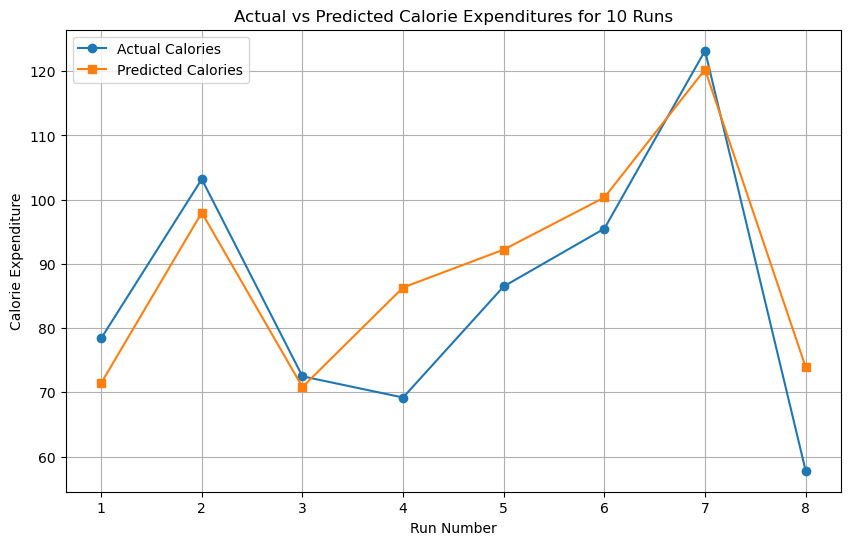

In [290]:
import matplotlib.pyplot as plt

def plot_calorie_expenditures(actual, predicted):
    """
    Plot actual vs predicted calorie expenditures.

    Parameters:
    - actual (list of float): List of actual calorie expenditures.
    - predicted (list of float): List of predicted calorie expenditures.
    """ 
    # Check if input lists are of the same length
    if len(actual) != len(predicted):
        raise ValueError("The lists 'actual' and 'predicted' must have the same number of elements.")
    
    # Generate a list of run indices for plotting
    runs = list(range(1, len(actual) + 1))
    
    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(runs, actual, 'o-', label='Actual Calories')
    plt.plot(runs, predicted, 's-', label='Predicted Calories')
    
    # Adding plot title and labels
    plt.title('Actual vs Predicted Calorie Expenditures for 10 Runs')
    plt.xlabel('Run Number')
    plt.ylabel('Calorie Expenditure')
    plt.xticks(runs)  # Ensure all run numbers appear as ticks
    
    # Adding a legend to distinguish actual and predicted
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.savefig('image.png')

# Example data
actual_calories = data_test.Actiheart
predicted_calories = list_pred

# Call the function with example data
plot_calorie_expenditures(actual_calories, predicted_calories)

In [291]:
# Calculate RMSE

import math

def calculate_rmse(actual, predicted):
    # Check if the lists are the same length
    if len(actual) != len(predicted):
        raise ValueError("The actual and predicted lists must have the same length.")

    # Calculate the square of differences
    square_errors = [(a - p) ** 2 for a, p in zip(actual, predicted)]
    
    # Calculate mean of square errors
    mean_square_error = sum(square_errors) / len(square_errors)
    
    # Take the square root of the mean square error to get RMSE
    rmse = math.sqrt(mean_square_error)
    
    return rmse

In [292]:
print(calculate_rmse(actual_calories, predicted_calories))

9.336035502349016


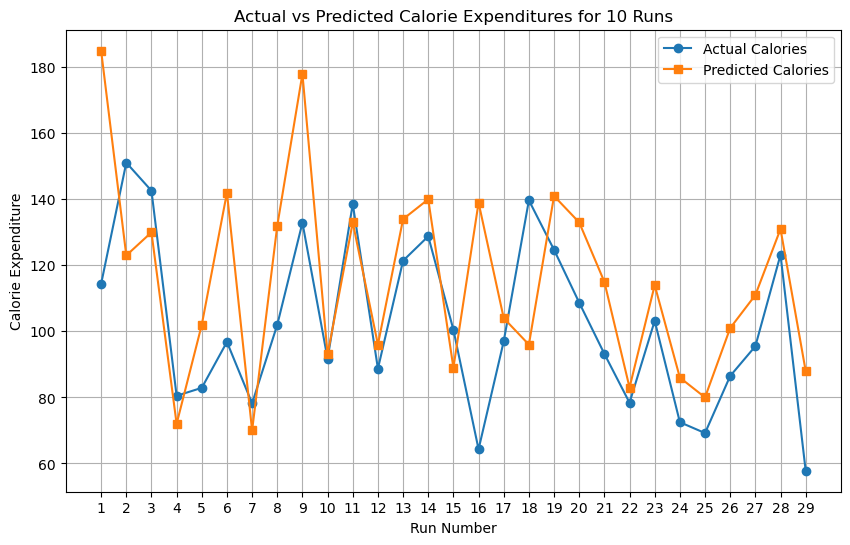

In [293]:
# How accurate is Apple Watch?

data = pd.read_csv('plos_one_data.csv')

predicted = data.Apple
actual_calories = data.Actiheart

plot_calorie_expenditures(actual_calories, predicted)

In [294]:
print(calculate_rmse(actual_calories, predicted))

27.945229683596548


# Use Personal Data

In [295]:
import numpy as np
import pandas as pd

data = pd.read_csv('runs.csv')
list_k = []

for index, row in data.iterrows():
    act_cal = float(row.calories)
    T = float(row.seconds)
    m = float(row.miles)

    # Example usage:
    E = act_cal * 4.184  # Energy in joules (assume (1 calorie ≈ 4.184 joules)
    M = 65
    V = (m*1609.344)/T   # Velocity in meters/second
    k_value = calculate_k(E, M, V, T)
    
    list_k.append(k_value)
print(list_k)

[0.0009941239577486727, 0.0017172549415920954, 0.0015824465159443373, 0.001430993958647054, 0.001740739687333581, 0.0011513631269243214, 0.0016596899474614095, 0.0010994225312307, 0.0018748242527347378, 0.0016602204816274137, 0.0017314952014568683, 0.0018132820989335795]


In [296]:
print(np.mean(list_k))

0.0015379880584695642


In [297]:
import numpy as np
import pandas as pd

data = pd.read_csv('runs.csv')
list_pred = []
list_pred_2 = []

for index, row in data.iterrows():
    act_cal = float(row.calories)
    T = float(row.seconds)
    m = float(row.miles)

    # Example usage:
    k = .001538
    k_2 = .001869
    M = 65     # Mass in kilograms
    V = (m*1609.344)/T    # Velocity in meters/second

    E_value = calculate_E(k, M, V, T)
    list_pred.append(E_value)
    
    E_value_2 = calculate_E(k_2, M, V, T)
    list_pred_2.append(E_value_2)
    
print(list_pred)

[69.61908468309662, 37.6158474990976, 81.64067391743959, 98.87952296722386, 65.38140126760378, 112.2078664661733, 77.84104506845182, 111.91329675795194, 97.62088352176609, 81.52170238698083, 34.641736199748955, 40.71291501935474]


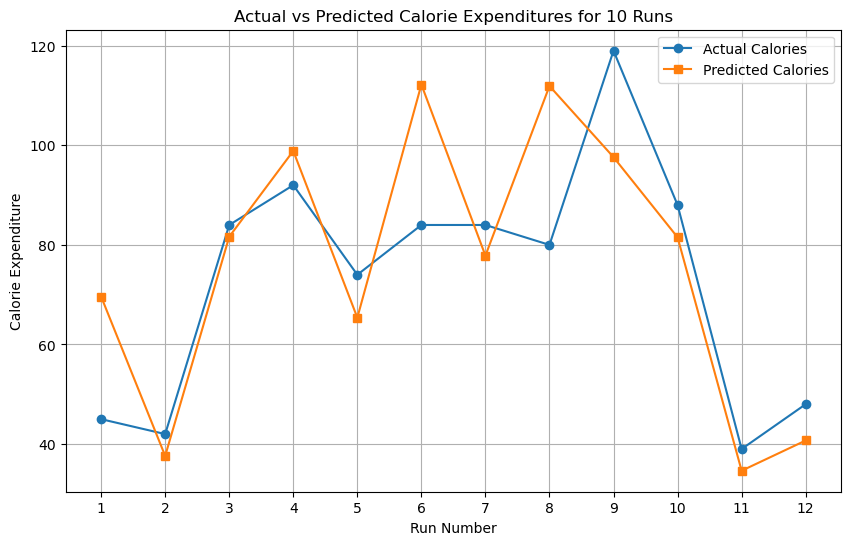

In [300]:
import matplotlib.pyplot as plt

def plot_calorie_expenditures(actual, predicted):
    """
    Plot actual vs predicted calorie expenditures.

    Parameters:
    - actual (list of float): List of actual calorie expenditures.
    - predicted (list of float): List of predicted calorie expenditures.
    """ 
    # Check if input lists are of the same length
    if len(actual) != len(predicted):
        raise ValueError("The lists 'actual' and 'predicted' must have the same number of elements.")
    
    # Generate a list of run indices for plotting
    runs = list(range(1, len(actual) + 1))
    
    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(runs, actual, 'o-', label='Actual Calories')
    plt.plot(runs, predicted, 's-', label='Predicted Calories')
    
    # Adding plot title and labels
    plt.title('Actual vs Predicted Calorie Expenditures for 10 Runs')
    plt.xlabel('Run Number')
    plt.ylabel('Calorie Expenditure')
    plt.xticks(runs)  # Ensure all run numbers appear as ticks
    
    # Adding a legend to distinguish actual and predicted
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.savefig('image.png')

# Example data
actual_calories = data.calories
predicted_calories = list_pred

# Call the function with example data
plot_calorie_expenditures(actual_calories, predicted_calories)

In [299]:
print(calculate_rmse(actual_calories, predicted_calories))

16.26781234605881


In [50]:
# Incorporate Heart Rate? Max heart rate? Other data I can get only for myself?